<a href="https://colab.research.google.com/github/tao-c/ml_notes/blob/master/comparing_features_in_TF_Linear_Regression_with_a_Real_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Linear Regression with a Real Dataset

This Colab uses a real dataset to predict the prices of houses in California.   






## Learning Objectives:

After doing this Colab, you'll know how to do the following:

  * Read a .csv file into a [pandas](https://developers.google.com/machine-learning/glossary/#pandas) DataFrame.
  * Examine a [dataset](https://developers.google.com/machine-learning/glossary/#data_set). 
  * Experiment with different [features](https://developers.google.com/machine-learning/glossary/#feature) in building a model.
  * Tune the model's [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter).

## The Dataset
  
The [dataset for this exercise](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) is based on 1990 census data from California. The dataset is old but still provides a great opportunity to learn about machine learning programming.

## Use the right version of TensorFlow

The following hidden code cell ensures that the Colab will run on TensorFlow 2.X.

In [1]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

## Import relevant modules

The following hidden code cell imports the necessary code to run the code in the rest of this Colaboratory.

In [3]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## The dataset

Datasets are often stored on disk or at a URL in [.csv format](https://wikipedia.org/wiki/Comma-separated_values). 

A well-formed .csv file contains column names in the first row, followed by many rows of data.  A comma divides each value in each row. For example, here are the first five rows of the .csv file file holding the California Housing Dataset:

```
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
```



### Load the .csv file into a pandas DataFrame

This Colab, like many machine learning programs, gathers the .csv file and stores the data in memory as a pandas Dataframe.  pandas is an open source Python library.  The primary datatype in pandas is a DataFrame.  You can imagine a pandas DataFrame as a spreadsheet in which each row is identified by a number and each column by a name. pandas is itself built on another open source Python library called NumPy. If you aren't familiar with these technologies, please view these two quick tutorials:

*   [NumPy](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=numpy_tf2-colab&hl=en)
*   [Pandas DataFrames](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en)

The following code cell imports the .csv file into a pandas DataFrame and scales the values in the label (`median_house_value`):

In [4]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


Scaling `median_house_value` puts the value of each house in units of thousands. Scaling will keep loss values and learning rates in a friendlier range.  

Although scaling a label is usually *not* essential, scaling features in a multi-feature model usually *is* essential.

## Examine the dataset

A large part of most machine learning projects is getting to know your data. The pandas API provides a `describe` function that outputs the following statistics about every column in the DataFrame:

* `count`, which is the number of rows in that column. Ideally, `count` contains the same value for every column. 

* `mean` and `std`, which contain the mean and standard deviation of the values in each column. 

* `min` and `max`, which contain the lowest and highest values in each column.

* `25%`, `50%`, `75%`, which contain various [quantiles](https://developers.google.com/machine-learning/glossary/#quantile).

In [5]:
# Get statistics on the dataset.
training_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


### Task 1: Identify anomalies in the dataset

Do you see any anomalies (strange values) in the data? 

In [ ]:
#@title Double-click to view a possible answer.

# The maximum value (max) of several columns seems very
# high compared to the other quantiles. For example,
# example the total_rooms column. Given the quantile
# values (25%, 50%, and 75%), you might expect the 
# max value of total_rooms to be approximately 
# 5,000 or possibly 10,000. However, the max value 
# is actually 37,937.

# When you see anomalies in a column, become more careful
# about using that column as a feature. That said,
# anomalies in potential features sometimes mirror 
# anomalies in the label, which could make the column 
# be (or seem to be) a powerful feature.
# Also, as you will see later in the course, you 
# might be able to represent (pre-process) raw data 
# in order to make columns into useful features.

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds a randomly-initialized model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the following headline to see the code that builds and trains a model.

In [6]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


## Define plotting functions

The following [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) functions create the following plots:

*  a scatter plot of the feature vs. the label, and a line showing the output of the trained model
*  a loss curve

You may optionally double-click the headline to see the matplotlib code, but note that writing matplotlib code is not an important part of learning ML programming.

In [7]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Call the model functions

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label). For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature. For now, you'll arbitrarily use `total_rooms` as that feature. 


Epoch 1/30
567/567 [==============================] - 1s 875us/step - loss: 4739801.7570 - root_mean_squared_error: 2024.3781
Epoch 2/30
567/567 [==============================] - 0s 855us/step - loss: 27998.2037 - root_mean_squared_error: 167.3040
Epoch 3/30
567/567 [==============================] - 1s 908us/step - loss: 27355.5039 - root_mean_squared_error: 165.3881
Epoch 4/30
567/567 [==============================] - 1s 912us/step - loss: 27207.5252 - root_mean_squared_error: 164.9025
Epoch 5/30
567/567 [==============================] - 0s 852us/step - loss: 26550.8319 - root_mean_squared_error: 162.8958
Epoch 6/30
567/567 [==============================] - 0s 861us/step - loss: 24259.9476 - root_mean_squared_error: 155.7341
Epoch 7/30
567/567 [==============================] - 0s 850us/step - loss: 24092.3868 - root_mean_squared_error: 155.2059
Epoch 8/30
567/567 [==============================] - 1s 882us/step - loss: 24015.5768 - root_mean_squared_error: 154.9338
Epoch 9/30
56

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


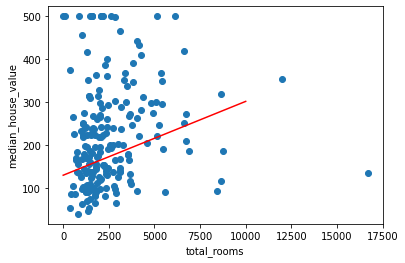

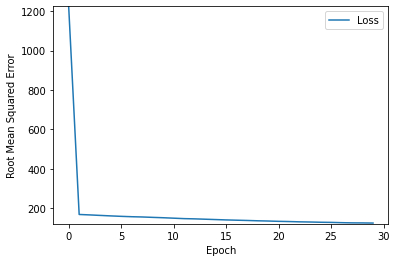

In [8]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

A certain amount of randomness plays into training a model. Consequently, you'll get different results each time you train the model. That said, given the dataset and the hyperparameters, the trained model will generally do a poor job describing the feature's relation to the label.

## Use the model to make predictions

You can use the trained model to make predictions. In practice, [you should make predictions on examples that are not used in training](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data). However, for this exercise, you'll just work with a subset of the same training dataset. A later Colab exercise will explore ways to make predictions on examples not used in training.

First, run the following code to define the house prediction function:

In [9]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

Now, invoke the house prediction function on 10 examples:

In [10]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             164
 3400     92             189
 3677     69             193
 2202     62             168
 2403     80             172
 5652    295             227
 3318    500             187
 2552    342             174
 1364    118             154
 3468    128             190


### Task 2: Judge the predictive power of the model

Look at the preceding table. How close is the predicted value to the label value?  In other words, does your model accurately predict house values?  

In [ ]:
#@title Double-click to view the answer.

# Most of the predicted values differ significantly
# from the label value, so the trained model probably 
# doesn't have much predictive power. However, the
# first 10 examples might not be representative of 
# the rest of the examples.  

## Task 3: Try a different feature

The `total_rooms` feature had only a little predictive power. Would a different feature have greater predictive power?  Try using `population` as the feature instead of `total_rooms`. 

Note: When you change features, you might also need to change the hyperparameters.

In [11]:
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


Epoch 1/3
142/142 [==============================] - 0s 1ms/step - loss: 6702065.6746 - root_mean_squared_error: 2396.7379
Epoch 2/3
142/142 [==============================] - 0s 863us/step - loss: 3609773.6451 - root_mean_squared_error: 1891.1541
Epoch 3/3
142/142 [==============================] - 0s 956us/step - loss: 2886636.5245 - root_mean_squared_error: 1692.0301


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


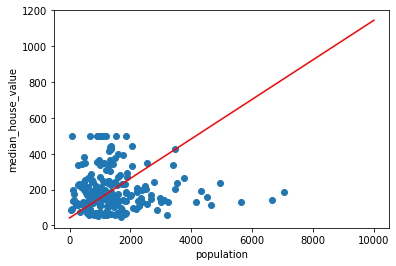

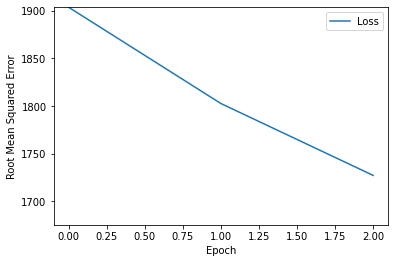

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             184
 1867     92             248
 2191     69             284
 1052     62             158
 1647     80             224
 2312    295             297
 1604    500             219
 1066    342             160
  338    118              79
 1604    128             219
 1200    187             174
  292     80              74
 2014    112             264
 1817     95             242
 1328     69             188


In [12]:
my_feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 2
epochs = 3
batch_size = 120

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

In [ ]:
#@title Double-click to view a possible solution.

my_feature = "population" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

Did `population` produce better predictions than `total_rooms`?

In [ ]:
#@title Double-click to view the answer.

# Training is not entirely deterministic, but population 
# typically converges at a slightly higher RMSE than 
# total_rooms.  So, population appears to be about 
# the same or slightly worse at making predictions 
# than total_rooms.

## Task 4: Define a synthetic feature

You have determined that `total_rooms` and `population` were not useful features.  That is, neither the total number of rooms in a neighborhood nor the neighborhood's population successfully predicted the median house price of that neighborhood. Perhaps though, the *ratio* of `total_rooms` to `population` might have some predictive power. That is, perhaps block density relates to median house value.

To explore this hypothesis, do the following: 

1. Create a [synthetic feature](https://developers.google.com/machine-learning/glossary/#synthetic_feature) that's a ratio of `total_rooms` to `population`. (If you are new to pandas DataFrames, please study the [Pandas DataFrame Ultraquick Tutorial](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en).)
2. Tune the three hyperparameters.
3. Determine whether this synthetic feature produces 
   a lower loss value than any of the single features you 
   tried earlier in this exercise.

In [13]:
training_df.shape

(17000, 9)

Epoch 1/30
532/532 [==============================] - 1s 814us/step - loss: 50160.4111 - root_mean_squared_error: 223.7083
Epoch 2/30
532/532 [==============================] - 0s 880us/step - loss: 26980.4167 - root_mean_squared_error: 164.0310
Epoch 3/30
532/532 [==============================] - 0s 922us/step - loss: 15978.3239 - root_mean_squared_error: 126.3820
Epoch 4/30
532/532 [==============================] - 0s 883us/step - loss: 16572.4652 - root_mean_squared_error: 128.3359
Epoch 5/30
532/532 [==============================] - 0s 849us/step - loss: 14931.3832 - root_mean_squared_error: 122.0612
Epoch 6/30
532/532 [==============================] - 0s 870us/step - loss: 14589.2531 - root_mean_squared_error: 120.7189
Epoch 7/30
532/532 [==============================] - 0s 872us/step - loss: 13687.3868 - root_mean_squared_error: 116.9579
Epoch 8/30
532/532 [==============================] - 0s 874us/step - loss: 15449.2607 - root_mean_squared_error: 123.9801
Epoch 9/30
532/5

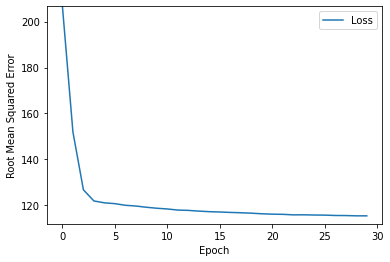

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             189
    2     92             200
    2     69             195
    2     62             211
    1     80             186
    2    295             224
    2    500             210
    2    342             222
    4    118             285
    2    128             213
    2    187             223
    3     80             233
    2    112             224
    2     95             218
    2     69             210


In [14]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = training_df["total_rooms"]/training_df["population"] # write your code here.

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size = 32

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

In [ ]:
#@title Double-click to view a possible solution to Task 4.

# Define a synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)


Based on the loss values, this synthetic feature produces a better model than the individual features you tried in Task 2 and Task 3. However, the model still isn't creating great predictions.


## Task 5. Find feature(s) whose raw values correlate with the label

So far, we've relied on trial-and-error to identify possible features for the model.  Let's rely on statistics instead.

A **correlation matrix** indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

  * `1.0`: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * `-1.0`: perfect negative correlation; that is, when one attribute rises, the other attribute falls. 
  * `0.0`: no correlation; the two column's [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

The following code cell generates the correlation matrix for attributes of the California Housing Dataset:

In [15]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


The correlation matrix shows nine potential features (including a synthetic
feature) and one label (`median_house_value`).  A strong negative correlation or strong positive correlation with the label suggests a potentially good feature.  

**Your Task:** Determine which of the nine potential features appears to be the best candidate for a feature?

In [ ]:
#@title Double-click here for the solution to Task 5

# The `median_income` correlates 0.7 with the label 
# (median_house_value), so median_income` might be a 
# good feature. The other seven potential features
# all have a correlation relatively close to 0. 

# If time permits, try median_income as the feature
# and see whether the model improves.

Correlation matrices don't tell the entire story. In later exercises, you'll find additional ways to unlock predictive power from potential features.

**Note:** Using `median_income` as a feature may raise some ethical and fairness
issues. Towards the end of the course, we'll explore ethical and fairness issues.

In [17]:
my_label

'median_house_value'

Epoch 1/24
567/567 [==============================] - 1s 876us/step - loss: 39498.6572 - root_mean_squared_error: 197.4795
Epoch 2/24
567/567 [==============================] - 0s 839us/step - loss: 7567.8037 - root_mean_squared_error: 86.9344
Epoch 3/24
567/567 [==============================] - 1s 884us/step - loss: 6901.4959 - root_mean_squared_error: 83.0636
Epoch 4/24
567/567 [==============================] - 1s 903us/step - loss: 6989.3065 - root_mean_squared_error: 83.5884
Epoch 5/24
567/567 [==============================] - 1s 879us/step - loss: 7138.4992 - root_mean_squared_error: 84.4713
Epoch 6/24
567/567 [==============================] - 1s 914us/step - loss: 7001.2399 - root_mean_squared_error: 83.6533
Epoch 7/24
567/567 [==============================] - 0s 866us/step - loss: 6971.0154 - root_mean_squared_error: 83.4830
Epoch 8/24
567/567 [==============================] - 0s 871us/step - loss: 7080.5119 - root_mean_squared_error: 84.1355
Epoch 9/24
567/567 [==========

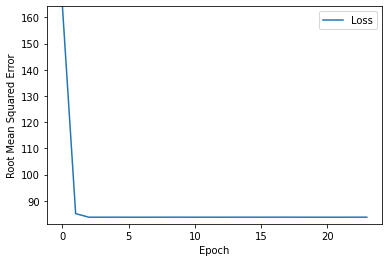

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             133
    4     92             210
    3     69             152
    2     62             131
    3     80             152
    2    295             146
   10    500             452
    5    342             257
    2    118             145
    4    128             219
    8    187             393
    3     80             161
    3    112             177
    4     95             219
    2     69             142


In [16]:
#@title Double-click to view a possible solution to Task 4.

# Define a synthetic feature
#training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "median_income"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)


# Make predictions

## Finally, predict have a look at the errors made by the model when making predictions on the test set:

In [18]:
training_df.shape

(17000, 10)

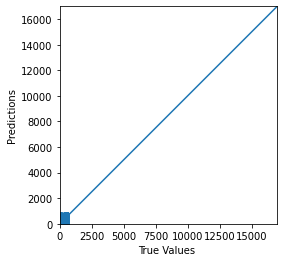

In [21]:
test_predictions = my_model.predict(training_df[my_feature]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(training_df[my_label], test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions')
lims = [0, 17000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [23]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.0


In [26]:
training_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
rooms_per_person      0
dtype: int64

In [28]:
train_dataset = training_df.sample(frac=0.8, random_state=0)
test_dataset = training_df.drop(train_dataset.index)

In [29]:
train_dataset.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.1
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.1,-0.1,-0.0,0.2,0.2,1.0


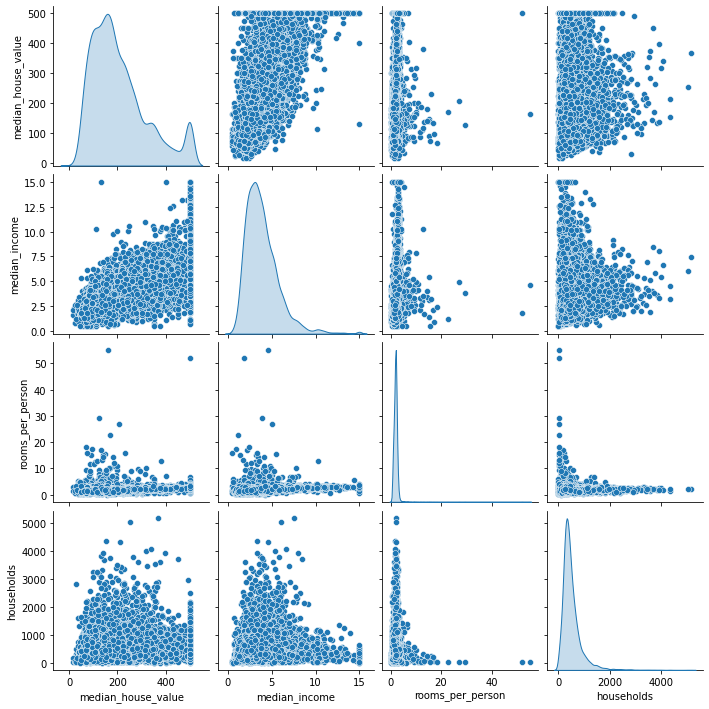

In [30]:
sns.pairplot(train_dataset[['median_house_value', 'median_income', 'rooms_per_person', 'households']], diag_kind='kde')

In [31]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,13600.0,-119.6,2.0,-124.3,-121.8,-118.5,-118.0,-114.3
latitude,13600.0,35.6,2.1,32.5,33.9,34.3,37.7,42.0
housing_median_age,13600.0,28.6,12.6,1.0,18.0,29.0,37.0,52.0
total_rooms,13600.0,2652.8,2178.5,2.0,1467.0,2134.0,3158.2,37937.0
total_bedrooms,13600.0,541.7,421.0,1.0,298.0,435.0,650.0,5471.0
population,13600.0,1434.9,1108.0,3.0,793.0,1173.0,1729.0,16122.0
households,13600.0,503.4,382.9,1.0,282.0,410.0,607.0,5189.0
median_income,13600.0,3.9,1.9,0.5,2.6,3.5,4.8,15.0
median_house_value,13600.0,207.3,116.0,15.0,119.3,179.7,264.8,500.0
rooms_per_person,13600.0,2.0,1.1,0.1,1.5,1.9,2.3,55.2


In [32]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('median_house_value')
test_labels = test_features.pop('median_house_value')

In [33]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
longitude,-119.6,2.0
latitude,35.6,2.1
housing_median_age,28.6,12.6
total_rooms,2652.8,2178.5
total_bedrooms,541.7,421.0
population,1434.9,1108.0
households,503.4,382.9
median_income,3.9,1.9
median_house_value,207.3,116.0
rooms_per_person,2.0,1.1


In [34]:
median_income = np.array(train_features['median_income'])

median_income_normalizer = preprocessing.Normalization(input_shape=[1,])
median_income_normalizer.adapt(median_income)

In [37]:
median_income_model = tf.keras.Sequential([
    median_income_normalizer,
    layers.Dense(units=1)
])

median_income_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 1)                 3         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [38]:
median_income_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [40]:
%%time
history = median_income_model.fit(
    train_features['median_income'], train_labels,
    epochs=20,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 9.07 s, sys: 626 ms, total: 9.69 s
Wall time: 8.01 s


In [41]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
15,60.7,61.2,15
16,60.7,61.3,16
17,60.7,61.2,17
18,60.7,61.2,18
19,60.7,61.3,19


In [46]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 150])
  plt.xlabel('Epoch')
  plt.ylabel('Error [median_house_value]')
  plt.legend()
  plt.grid(True)

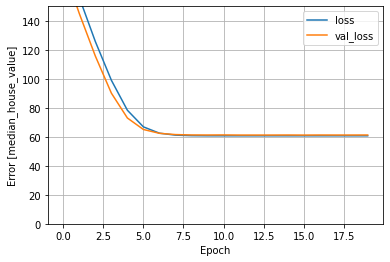

In [47]:
plot_loss(history)

In [48]:
test_results = {}

test_results['median_income_model'] = median_income_model.evaluate(
    test_features['median_income'],
    test_labels, verbose=0)

In [50]:
test_dataset.shape, train_dataset.shape

((3400, 10), (13600, 10))

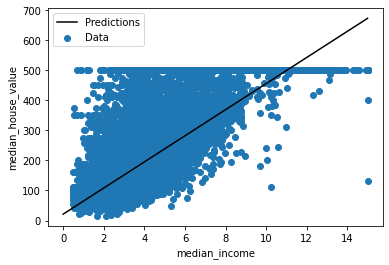

In [66]:
x = tf.linspace(0.0, 15, 340)
y = median_income_model.predict(x)
def plot_horsepower(x, y):
  plt.scatter(train_features['median_income'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('median_income')
  plt.ylabel('median_house_value')
  plt.legend()

plot_horsepower(x,y)

# Multiple inputs

## You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same 𝑦=𝑚𝑥+𝑏 except that 𝑚 is a matrix and 𝑏 is a vector.
## This time use the Normalization layer that was adapted to the whole dataset.

In [53]:
normalizer = preprocessing.Normalization()
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [55]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [56]:

%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=20,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 10.1 s, sys: 675 ms, total: 10.8 s
Wall time: 8.85 s


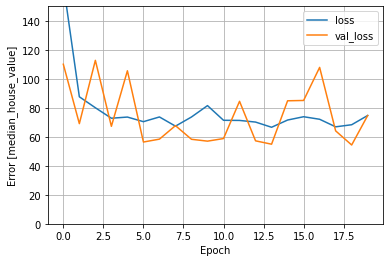

In [57]:
plot_loss(history)

In [58]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

# A DNN regression

In [59]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [60]:
dnn_median_income_model = build_and_compile_model(median_income_normalizer)

In [62]:
dnn_median_income_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 1)                 3         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [64]:
%%time
history = dnn_median_income_model.fit(
    train_features['median_income'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=20)

CPU times: user 13.4 s, sys: 1.05 s, total: 14.5 s
Wall time: 11.2 s


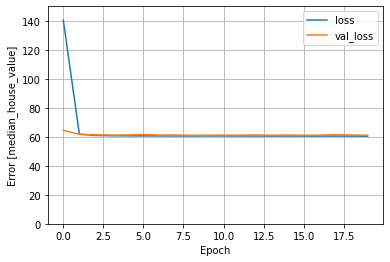

In [65]:
plot_loss(history)

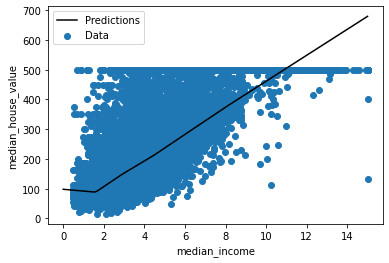

In [67]:
x = tf.linspace(0.0, 15, 340)
y = dnn_median_income_model.predict(x)
plot_horsepower(x, y)

In [68]:
test_results['dnn_median_income_model'] = dnn_median_income_model.evaluate(
    test_features['median_income'], test_labels,
    verbose=0)

# Full model

In [70]:
dnn_model = build_and_compile_model(normalizer)


In [72]:
dnn_model

In [73]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=20)

Epoch 1/20
340/340 [==============================] - 1s 3ms/step - loss: 102.7987 - val_loss: 80.9040
Epoch 2/20
340/340 [==============================] - 1s 2ms/step - loss: 78.0946 - val_loss: 77.2376
Epoch 3/20
340/340 [==============================] - 1s 2ms/step - loss: 76.9170 - val_loss: 76.3272
Epoch 4/20
340/340 [==============================] - 1s 2ms/step - loss: 75.5234 - val_loss: 75.3687
Epoch 5/20
340/340 [==============================] - 1s 2ms/step - loss: 74.5197 - val_loss: 76.0342
Epoch 6/20
340/340 [==============================] - 1s 2ms/step - loss: 71.7655 - val_loss: 72.1404
Epoch 7/20
340/340 [==============================] - 1s 2ms/step - loss: 70.5854 - val_loss: 72.1978
Epoch 8/20
340/340 [==============================] - 1s 2ms/step - loss: 69.7370 - val_loss: 67.9214
Epoch 9/20
340/340 [==============================] - 1s 2ms/step - loss: 68.5765 - val_loss: 78.0828
Epoch 10/20
340/340 [==============================] - 1s 2ms/step - loss: 67.405

In [74]:
dnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati multiple                  19        
_________________________________________________________________
dense_13 (Dense)             (32, 64)                  640       
_________________________________________________________________
dense_14 (Dense)             (32, 64)                  4160      
_________________________________________________________________
dense_15 (Dense)             (32, 1)                   65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


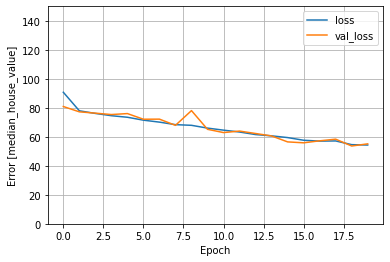

In [75]:
plot_loss(history)

In [76]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [77]:
pd.DataFrame(test_results, index=['Mean absolute error [median_house_value]']).T

,Mean absolute error [median_house_value]
median_income_model,61.2
linear_model,74.8
dnn_median_income_model,61.0
dnn_model,54.9


In [78]:
test_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
count,3400.0,3400.0,3400.0,3400.0,3400.0,3400.0,3400.0,3400.0,3400.0,3400.0
mean,-119.5,35.6,28.7,2607.2,530.3,1408.2,492.7,3.9,207.3,2.0
std,2.0,2.2,12.6,2185.7,423.4,1295.1,390.9,1.9,116.0,1.4
min,-124.3,32.6,2.0,20.0,3.0,13.0,4.0,0.5,15.0,0.0
25%,-121.7,33.9,18.0,1439.0,294.0,775.8,278.0,2.6,120.2,1.5
50%,-118.4,34.2,29.0,2106.0,427.0,1144.0,404.0,3.6,182.1,1.9
75%,-118.0,37.7,37.0,3120.0,642.0,1695.2,598.0,4.7,266.0,2.3
max,-114.6,41.9,52.0,32627.0,6445.0,35682.0,6082.0,15.0,500.0,41.3


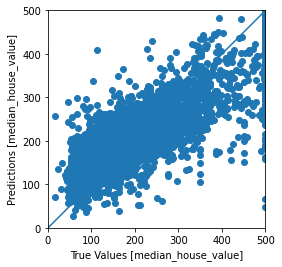

In [79]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

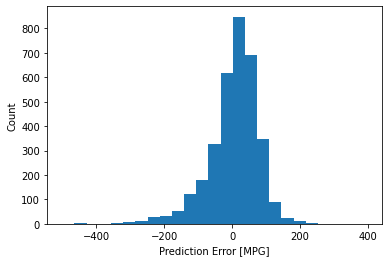

In [80]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')